# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [2]:
# importing required libraries
import pandas as pd

In [3]:
# reading the loan prediction data
train = pd.read_csv('train.csv')

In [4]:
train.shape

(8523, 12)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.shape

(5681, 11)

In [8]:
test['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].min()

In [9]:
data = pd.concat([train, test], axis = 0)

In [10]:
# looking at the first five rows of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,33.29
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,33.29
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,33.29
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,33.29
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,33.29


In [12]:
# shape of the data
data.shape

(14204, 12)

In [13]:
# checking missing values in the data
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# data types of the variables
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
# drop Item Identifier
data.drop(columns = ['Item_Identifier'], inplace = True)

In [16]:
data['Item_Fat_Content']=data['Item_Fat_Content'].astype('category');

In [17]:
data['Outlet_Identifier'].nunique()

10

In [18]:
data['Item_Type']=data['Item_Type'].astype('category');
data['Outlet_Identifier']=data['Outlet_Identifier'].astype('category');
data['Outlet_Size']=data['Outlet_Size'].astype('category');
data['Outlet_Location_Type']=data['Outlet_Location_Type'].astype('category');
data['Outlet_Type']=data['Outlet_Type'].astype('category');

In [19]:
data.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

## 1. Filling the missing values

### Categorical Data: Mode

In [20]:
# filling missing values of categorical variables with mode

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

### Continuous Data: Mean

In [21]:
# filling missing values of continuous variables with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [22]:
# checking missing values after imputation
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2. Converting categories to numbers

In [23]:
data.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [24]:
# converting the categories into numbers using map function
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat': 0, 'LF' : 0, 'low fat' : 0, 'Regular' : 1, 'reg' : 1})
data['Item_Fat_Content'] = data['Item_Fat_Content'].astype('int64')
data['Outlet_Size'] = data['Outlet_Size'].map({'Small' : 0, 'Medium' : 1, 'High' : 2})
data['Outlet_Size'] = data['Outlet_Size'].astype('int64')
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 3' : 0, 'Tier 2' : 1, 'Tier 1' : 2})
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].astype('int64')

In [25]:
data = pd.get_dummies(data)

In [26]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,2,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,0,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,2,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,1,0,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,0,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
data.shape

(14204, 38)

In [28]:
data.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5676,10.5,1,0.013496,141.3154,1997,0,2,33.29,0,0,...,0,0,0,0,1,0,0,1,0,0
5677,7.6,1,0.142991,169.1448,2009,1,0,33.29,0,0,...,0,0,0,0,0,0,0,0,1,0
5678,10.0,0,0.073529,118.7440,2002,1,1,33.29,0,0,...,0,0,0,1,0,0,0,1,0,0
5679,15.3,1,0.000000,214.6218,2007,1,1,33.29,0,0,...,0,0,0,0,0,0,0,1,0,0
5680,9.5,1,0.104720,79.7960,2002,1,1,33.29,0,0,...,0,0,0,1,0,0,0,1,0,0


In [67]:
max_sales = data['Item_Outlet_Sales'].max()

In [69]:
min_sales = data['Item_Outlet_Sales'].min()

## 3. Scale all variables between 0 and 1

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaled_data = pd.DataFrame(scaler.fit_transform(data))

In [32]:
scaled_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
14199,0.353974,1.0,0.041099,0.467004,0.500000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14200,0.181304,1.0,0.435429,0.585126,1.000000,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14201,0.324204,0.0,0.223906,0.371199,0.708333,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14202,0.639774,1.0,0.000000,0.778154,0.916667,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14203,0.294433,1.0,0.318889,0.205884,0.708333,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
train = scaled_data.iloc[0:8523]

In [34]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.282525,0.0,0.048866,0.927507,0.583333,0.5,1.0,0.283587,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.081274,1.0,0.058705,0.072068,1.000000,0.5,0.0,0.031419,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.051037,0.468288,0.583333,0.5,1.0,0.158115,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.871986,1.0,0.000000,0.640093,0.541667,0.5,0.0,0.053555,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.0,0.000000,0.095805,0.083333,1.0,0.0,0.073651,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
test = scaled_data.iloc[8523:]

In [36]:
test.tail()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
14199,0.353974,1.0,0.041099,0.467004,0.500000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14200,0.181304,1.0,0.435429,0.585126,1.000000,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14201,0.324204,0.0,0.223906,0.371199,0.708333,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14202,0.639774,1.0,0.000000,0.778154,0.916667,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14203,0.294433,1.0,0.318889,0.205884,0.708333,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
test.drop(columns = [7], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7028\2558170544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = [7], inplace = True)


In [38]:
train.shape

(8523, 38)

In [39]:
test.shape

(5681, 37)

In [40]:
x_train = train.drop(columns = [7])

In [41]:
y_train = train[:][7]

In [42]:
x_train.head()

,0,1,2,3,4,5,6,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,0.282525,0.0,0.048866,0.927507,0.583333,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.081274,1.0,0.058705,0.072068,1.000000,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.051037,0.468288,0.583333,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.871986,1.0,0.000000,0.640093,0.541667,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.0,0.000000,0.095805,0.083333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
y_train.head()

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
Name: 7, dtype: float64

# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [47]:
X = x_train

In [49]:
y = y_train

In [50]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 37), (8523,))

In [51]:
X.head()

,0,1,2,3,4,5,6,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,0.282525,0.0,0.048866,0.927507,0.583333,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.081274,1.0,0.058705,0.072068,1.000000,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.051037,0.468288,0.583333,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.871986,1.0,0.000000,0.640093,0.541667,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.0,0.000000,0.095805,0.083333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
y.head()

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
Name: 7, dtype: float64

## 2. Creating training and validation set

In [53]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Creating training and validation set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [55]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((6818, 37), (6818,)), ((1705, 37), (1705,)))

## 3. Defining the architecture of the model

In [56]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

In [57]:
# defining input neurons
input_neurons = X_train.shape[1]

In [58]:
# define number of output neurons
output_neurons = 1

In [59]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 15
neuron_hidden_layer_2 = 5

In [60]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [61]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                570       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [62]:
# compiling the model


model.compile(loss='MeanSquaredError',optimizer='Adam',metrics=['MeanSquaredError'])

## 5. Training the model


In [64]:
# training the model

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18)

Epoch 1/18
214/214 [==============================] - 1s 3ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 2/18
214/214 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 3/18
214/214 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 4/18
214/214 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 5/18
214/214 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 6/18
214/214 [==============================] - 0s 2ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7/18
214/214 [========

### Visualizing the model performance

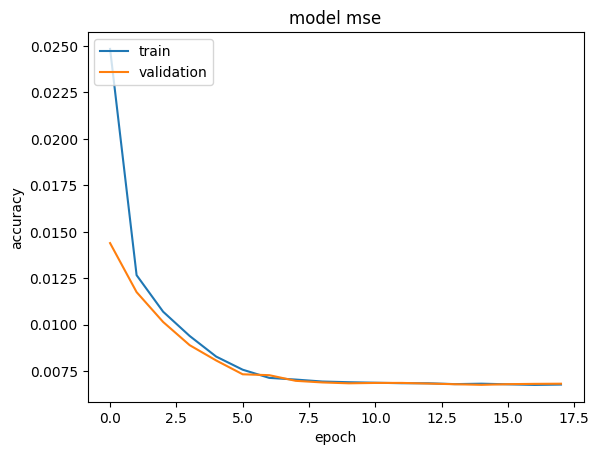

In [65]:
# summarize history for mse
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Final Prediction

In [66]:
prediction = model.predict(test)

178/178 [==============================] - 0s 1ms/step


In [70]:
prediction = prediction*(max_sales-min_sales) + min_sales

In [73]:
prediction.shape

(5681, 1)

In [74]:
sample = pd.read_csv('sample_submission.csv')

In [75]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [76]:
sample.shape

(5681, 3)

In [77]:
sample['Item_Outlet_Sales'] = prediction

In [ ]:
sample['Itemn_']

In [78]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1750.046143
1,FDW14,OUT017,1559.908203
2,NCN55,OUT010,474.687958
3,FDQ58,OUT017,2526.935547
4,FDY38,OUT027,5768.116211


In [86]:
sample.loc[sample.Item_Outlet_Sales < 0,['Item_Outlet_Sales']] = 0

In [88]:
sample.to_csv('submission.csv', index = False)